<a href="https://colab.research.google.com/github/Alex-Jung-HB/0804_python_Kalman-Filter/blob/main/0804_python_Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 1: 1D ÏπºÎßåÌïÑÌÑ∞Î°ú ÎÖ∏Ïù¥Ï¶à ÏúÑÏπò Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ïÌïòÍ∏∞

In [10]:
# Day 1 Lab: ÏπºÎßåÌïÑÌÑ∞ÏôÄ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ†ÅÍ∏∞Î≤ï (Kalman Filter and Data Tracking)
# ====================================================================
# Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÄ ÏûêÏú®Ï£ºÌñâ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Í∞ïÏùòÏùò Ï≤´ Î≤àÏß∏ Ïã§ÏäµÏûÖÎãàÎã§.
# Í∞Å Ïã§ÏäµÏùÄ Python ÌëúÏ§Ä ÎùºÏù¥Î∏åÎü¨Î¶¨, NumPy, matplotlibÎßå ÏÇ¨Ïö©ÌïòÎ©∞,
# ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞Ïùò ÎÖ∏Ïù¥Ï¶à Î≥¥Ï†ïÍ≥º ÏúµÌï©ÏùÑ Îã§Î£πÎãàÎã§.
# ====================================================================

# ================================================================
# Lab 1: 1D ÏπºÎßåÌïÑÌÑ∞Î°ú ÎÖ∏Ïù¥Ï¶à ÏúÑÏπò Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ïÌïòÍ∏∞
# ================================================================
"""
Î™©Ìëú:
- ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÏÑûÏù∏ 1Ï∞®Ïõê ÏúÑÏπò Îç∞Ïù¥ÌÑ∞Î•º Kalman FilterÎ°ú Î≥¥Ï†ïÌï©ÎãàÎã§.
- Python ÌëúÏ§Ä ÎùºÏù¥Î∏åÎü¨Î¶¨Îßå ÏÇ¨Ïö©Ìï©ÎãàÎã§.

ÏπºÎßå ÌïÑÌÑ∞ ÌïµÏã¨ Í∞úÎÖê:
1. ÏòàÏ∏°(Prediction): Ïù¥Ï†Ñ ÏÉÅÌÉúÎ•º Î∞îÌÉïÏúºÎ°ú ÌòÑÏû¨ ÏÉÅÌÉú ÏòàÏ∏°
2. Í∞±Ïã†(Update): Ï∏°Ï†ïÍ∞íÏùÑ Î∞õÏïÑ ÏòàÏ∏°ÏùÑ Î≥¥Ï†ï
3. ÏπºÎßå Í≤åÏù∏(Kalman Gain): ÏòàÏ∏°Í≥º Ï∏°Ï†ï Ï§ë Ïñ¥Îäê Í≤ÉÏùÑ Îçî ÎØøÏùÑÏßÄ Í≤∞Ï†ï
"""

print("="*70)
print("Lab 1: 1D ÏπºÎßåÌïÑÌÑ∞Î°ú ÎÖ∏Ïù¥Ï¶à ÏúÑÏπò Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ïÌïòÍ∏∞")
print("="*70)

# 1D ÏπºÎßåÌïÑÌÑ∞ ÏòàÏ†ú (Python ÌëúÏ§Ä ÎùºÏù¥Î∏åÎü¨Î¶¨)
import random

# Step 1: ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÏûàÎäî ÏúÑÏπò Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
# ------------------------------------------------
print("\n[Step 1] ÎÖ∏Ïù¥Ï¶à Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±")
print("-" * 30)

true_position = 0  # Ïã§Ï†ú ÏúÑÏπò (Ïö∞Î¶¨Í∞Ä Ï∂îÏ†ïÌïòÎ†§Îäî ÏßÑÏã§Í∞í)
print(f"Ïã§Ï†ú ÏúÑÏπò (ÏßÑÏã§Í∞í): {true_position}")

# random.gauss(ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®)Î•º ÏÇ¨Ïö©Ìï¥ Í∞ÄÏö∞ÏãúÏïà ÎÖ∏Ïù¥Ï¶à ÏÉùÏÑ±
# Ïã§Ï†ú ÏúÑÏπò 0Ïóê ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1Ïù∏ ÎÖ∏Ïù¥Ï¶àÎ•º ÎçîÌï¥ 10Í∞úÏùò Ï∏°Ï†ïÍ∞í ÏÉùÏÑ±
measured_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
print(f"ÎÖ∏Ïù¥Ï¶àÍ∞Ä Ìè¨Ìï®Îêú Ï∏°Ï†ï ÏúÑÏπò (10Í∞ú): {[round(x, 3) for x in measured_positions]}")

# Step 2: ÏπºÎßåÌïÑÌÑ∞ Ï¥àÍ∏∞Í∞í ÏÑ§Ï†ï
# ------------------------------
print("\n[Step 2] ÏπºÎßåÌïÑÌÑ∞ Ï¥àÍ∏∞Í∞í ÏÑ§Ï†ï")
print("-" * 35)

# estimate: ÌòÑÏû¨ ÏúÑÏπòÏóê ÎåÄÌïú Ï∂îÏ†ïÍ∞í (Ï¥àÍ∏∞Í∞íÏùÄ Î≥¥ÌÜµ 0 ÎòêÎäî Ï≤´ Î≤àÏß∏ Ï∏°Ï†ïÍ∞í ÏÇ¨Ïö©)
estimate = 0
print(f"Ï¥àÍ∏∞ Ï∂îÏ†ïÍ∞í: {estimate}")

# estimate_error: Ï∂îÏ†ïÍ∞íÏùò Î∂àÌôïÏã§ÏÑ± (Í≥µÎ∂ÑÏÇ∞). ÌÅ¥ÏàòÎ°ù Ï∂îÏ†ïÏù¥ Î∂àÌôïÏã§Ìï®
estimate_error = 1
print(f"Ï¥àÍ∏∞ Ï∂îÏ†ï Ïò§Ï∞® (Î∂àÌôïÏã§ÏÑ±): {estimate_error}")

# measurement_error: Ï∏°Ï†ïÍ∞íÏùò Î∂àÌôïÏã§ÏÑ±. ÏÑºÏÑú ÌäπÏÑ±Ïóê Îî∞Îùº Í≤∞Ï†ï
measurement_error = 1
print(f"Ï∏°Ï†ï Ïò§Ï∞® (ÏÑºÏÑú ÎÖ∏Ïù¥Ï¶à): {measurement_error}")

# Step 3: ÏòàÏ∏°-Í∞±Ïã† Î∞òÎ≥µ (ÏπºÎßåÌïÑÌÑ∞Ïùò ÌïµÏã¨!)
# -------------------------------------------
print("\n[Step 3] ÏπºÎßåÌïÑÌÑ∞ ÏòàÏ∏°-Í∞±Ïã† Í≥ºÏ†ï")
print("-" * 40)
print("Îã®Í≥ÑÎ≥Ñ Ï∂îÏ†ïÍ∞í Î≥ÄÌôî:")
print("Ï∏°Ï†ïÍ∞í -> ÏπºÎßåÍ≤åÏù∏ -> ÏÉàÎ°úÏö¥Ï∂îÏ†ïÍ∞í -> ÏÉàÎ°úÏö¥Ïò§Ï∞®")

for i, z in enumerate(measured_positions):
    # Ï†ÄÏû•Ïö© (Ï∂úÎ†•ÏùÑ ÏúÑÌï¥)
    old_estimate = estimate
    old_error = estimate_error

    # ÏπºÎßå Í≤åÏù∏ Í≥ÑÏÇ∞ (Kalman Gain)
    # K = P / (P + R)
    # P: Ï∂îÏ†ï Ïò§Ï∞®, R: Ï∏°Ï†ï Ïò§Ï∞®
    # ÏπºÎßå Í≤åÏù∏Ïù¥ ÌÅ¥ÏàòÎ°ù Ï∏°Ï†ïÍ∞íÏùÑ Îçî Ïã†Î¢∞, ÏûëÏùÑÏàòÎ°ù ÏòàÏ∏°Í∞íÏùÑ Îçî Ïã†Î¢∞
    kalman_gain = estimate_error / (estimate_error + measurement_error)

    # Ï∂îÏ†ïÍ∞í ÏóÖÎç∞Ïù¥Ìä∏ (Innovation)
    # ÏÉàÎ°úÏö¥ Ï∂îÏ†ïÍ∞í = Ïù¥Ï†Ñ Ï∂îÏ†ïÍ∞í + K √ó (Ï∏°Ï†ïÍ∞í - Ïù¥Ï†Ñ Ï∂îÏ†ïÍ∞í)
    # (Ï∏°Ï†ïÍ∞í - Ïù¥Ï†Ñ Ï∂îÏ†ïÍ∞í)ÏùÑ 'innovation' ÎòêÎäî 'residual'Ïù¥ÎùºÍ≥† Ìï®
    innovation = z - estimate  # Ï∏°Ï†ïÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏùò Ï∞®Ïù¥
    estimate = estimate + kalman_gain * innovation

    # Ï∂îÏ†ï Ïò§Ï∞® ÏóÖÎç∞Ïù¥Ìä∏ (Covariance Update)
    # ÏÉàÎ°úÏö¥ Ïò§Ï∞® = (1 - K) √ó Ïù¥Ï†Ñ Ïò§Ï∞®
    # ÏπºÎßå Í≤åÏù∏Ïù¥ ÌÅ¥ÏàòÎ°ù Ïò§Ï∞®Í∞Ä Îçî ÎßéÏù¥ Ï§ÑÏñ¥Îì¶
    estimate_error = (1 - kalman_gain) * estimate_error

    # Í∞Å Îã®Í≥ÑÎ≥Ñ Í≤∞Í≥º Ï∂úÎ†• (Ï≤òÏùå 3Í∞úÏôÄ ÎßàÏßÄÎßâÎßå Ï∂úÎ†•)
    if i < 3 or i == len(measured_positions) - 1:
        print(f"[{i+1:2d}] {z:6.3f} -> K={kalman_gain:.3f} -> {estimate:6.3f} -> err={estimate_error:.3f}")

print(f"\nÏµúÏ¢Ö Ï∂îÏ†ïÍ∞í: {estimate:.6f}")
print(f"Ïã§Ï†úÍ∞íÍ≥ºÏùò Ïò§Ï∞®: {abs(estimate - true_position):.6f}")

Lab 1: 1D ÏπºÎßåÌïÑÌÑ∞Î°ú ÎÖ∏Ïù¥Ï¶à ÏúÑÏπò Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ïÌïòÍ∏∞

[Step 1] ÎÖ∏Ïù¥Ï¶à Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
------------------------------
Ïã§Ï†ú ÏúÑÏπò (ÏßÑÏã§Í∞í): 0
ÎÖ∏Ïù¥Ï¶àÍ∞Ä Ìè¨Ìï®Îêú Ï∏°Ï†ï ÏúÑÏπò (10Í∞ú): [1.222, 0.695, 1.308, -1.721, 0.198, 0.459, -0.842, 0.363, -2.122, -0.258]

[Step 2] ÏπºÎßåÌïÑÌÑ∞ Ï¥àÍ∏∞Í∞í ÏÑ§Ï†ï
-----------------------------------
Ï¥àÍ∏∞ Ï∂îÏ†ïÍ∞í: 0
Ï¥àÍ∏∞ Ï∂îÏ†ï Ïò§Ï∞® (Î∂àÌôïÏã§ÏÑ±): 1
Ï∏°Ï†ï Ïò§Ï∞® (ÏÑºÏÑú ÎÖ∏Ïù¥Ï¶à): 1

[Step 3] ÏπºÎßåÌïÑÌÑ∞ ÏòàÏ∏°-Í∞±Ïã† Í≥ºÏ†ï
----------------------------------------
Îã®Í≥ÑÎ≥Ñ Ï∂îÏ†ïÍ∞í Î≥ÄÌôî:
Ï∏°Ï†ïÍ∞í -> ÏπºÎßåÍ≤åÏù∏ -> ÏÉàÎ°úÏö¥Ï∂îÏ†ïÍ∞í -> ÏÉàÎ°úÏö¥Ïò§Ï∞®
[ 1]  1.222 -> K=0.500 ->  0.611 -> err=0.500
[ 2]  0.695 -> K=0.333 ->  0.639 -> err=0.333
[ 3]  1.308 -> K=0.250 ->  0.806 -> err=0.250
[10] -0.258 -> K=0.091 -> -0.064 -> err=0.091

ÏµúÏ¢Ö Ï∂îÏ†ïÍ∞í: -0.063558
Ïã§Ï†úÍ∞íÍ≥ºÏùò Ïò§Ï∞®: 0.063558


 Lab 2: ÏÑºÏÑú ÏúµÌï© (GPS + IMU) Í∞ÄÏ§ë ÌèâÍ∑† Ïã§Ïäµ

/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 49468 (\N{HANGUL SYLLABLE SEN}) missing from font(s) DejaVu Sans.
  plt.tight_layo



Lab 2: ÏÑºÏÑú ÏúµÌï© (GPS + IMU) Í∞ÄÏ§ë ÌèâÍ∑† Ïã§Ïäµ

[Step 1] GPSÏôÄ IMU ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
----------------------------------------
Ïã§Ï†ú ÏúÑÏπò: 0
GPS Ï∏°Ï†ïÍ∞í (Ï†ïÌôï, œÉ=1): [-0.514, 0.609, 0.23, 2.155, -0.496, 0.623, 0.564, 0.123, 0.003, -0.948]
IMU Ï∏°Ï†ïÍ∞í (Î∂ÄÏ†ïÌôï, œÉ=2): [-2.319, -1.563, 1.359, -1.429, 2.532, 0.686, -2.198, 2.601, 0.632, -0.546]

[Step 2] ÏÑºÏÑú Ïã†Î¢∞ÎèÑ ÏÑ§Ï†ï
------------------------------
GPS Í∞ÄÏ§ëÏπò: 0.6 (Îçî Ï†ïÌôïÌïú ÏÑºÏÑú)
IMU Í∞ÄÏ§ëÏπò: 0.4 (Îçú Ï†ïÌôïÌïú ÏÑºÏÑú)
Í∞ÄÏ§ëÏπò Ìï©: 1.0 (Î∞òÎìúÏãú 1Ïù¥Ïñ¥Ïïº Ìï®)

[Step 3] Í∞ÄÏ§ë ÌèâÍ∑†ÏúºÎ°ú ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏúµÌï©
---------------------------------------------
ÏúµÌï© Í≥ºÏ†ï ÏòàÏãú (Ï≤òÏùå 3Í∞ú):
[1] GPS:-0.514 √ó 0.6 + IMU:-2.319 √ó 0.4 = -1.236
[2] GPS: 0.609 √ó 0.6 + IMU:-1.563 √ó 0.4 = -0.260
[3] GPS: 0.230 √ó 0.6 + IMU: 1.359 √ó 0.4 =  0.682

GPS Ï∏°Ï†ïÍ∞í: [-0.514, 0.609, 0.23, 2.155, -0.496, 0.623, 0.564, 0.123, 0.003, -0.948]
IMU Ï∏°Ï†ïÍ∞í: [-2.319, -1.563, 1.359, -1.429, 2.532, 0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49468 (\N{HANGUL SYLLABLE SEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50997 (\N{HANGUL SYLLABLE YUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

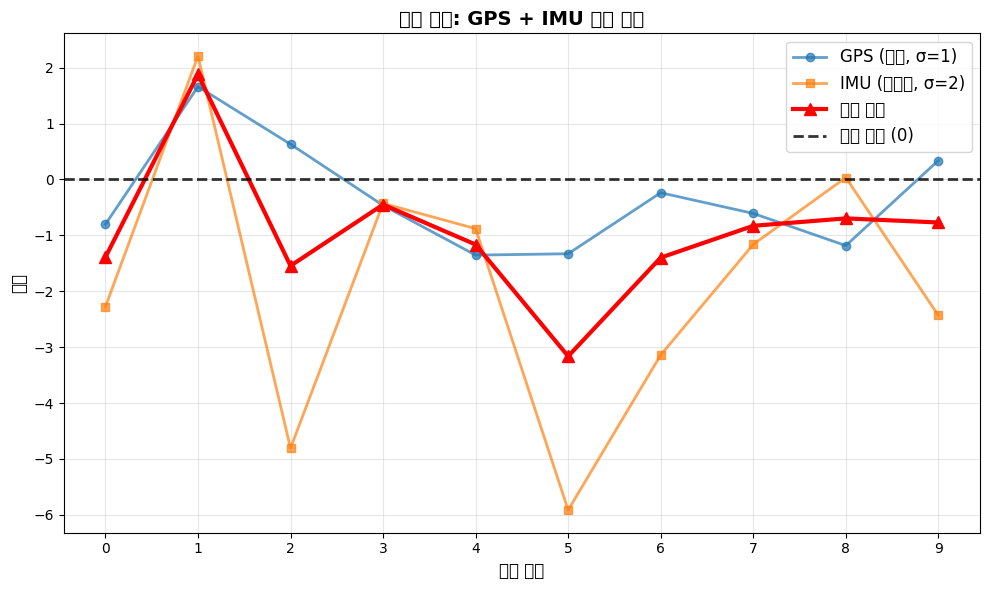


[ÏÑ±Îä• ÎπÑÍµê - ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)]
GPS MSE:  0.9551
IMU MSE:  8.6202
ÏúµÌï© MSE: 2.3131
ÏúµÌï©ÏúºÎ°ú Ïù∏Ìïú Í∞úÏÑ†: -142.2%


In [8]:
# ================================================================
# Lab 2: ÏÑºÏÑú ÏúµÌï© (GPS + IMU) Í∞ÄÏ§ë ÌèâÍ∑† Ïã§Ïäµ
# ================================================================
"""
Î™©Ìëú:
- GPSÏôÄ IMU(Í¥ÄÏÑ±Ï∏°Ï†ïÏû•Ïπò) Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ§ë ÌèâÍ∑†ÏúºÎ°ú ÏúµÌï©Ìï©ÎãàÎã§.
- Îëê ÏÑºÏÑúÏùò Ïã†Î¢∞ÎèÑÍ∞Ä Îã§Î•º Îïå Ïñ¥ÎñªÍ≤å Îç∞Ïù¥ÌÑ∞Î•º Í≤∞Ìï©ÌïòÎäîÏßÄ ÌïôÏäµÌï©ÎãàÎã§.

ÏÑºÏÑú ÏúµÌï©Ïùò ÌïÑÏöîÏÑ±:
- GPS: Ï†ïÌôïÌïòÏßÄÎßå Ïã§ÎÇ¥ÏóêÏÑú Ïã†Ìò∏ ÏïΩÌï®, ÏóÖÎç∞Ïù¥Ìä∏ ÎäêÎ¶º
- IMU: Îπ†Î•¥ÏßÄÎßå ÎìúÎ¶¨ÌîÑÌä∏ Î∞úÏÉù, ÎàÑÏ†Å Ïò§Ï∞®
- ÏúµÌï©: Í∞Å ÏÑºÏÑúÏùò Ïû•Ï†êÏùÑ ÏÇ¥Î¶¨Í≥† Îã®Ï†êÏùÑ Î≥¥ÏôÑ
"""

print("\n\n" + "="*70)
print("Lab 2: ÏÑºÏÑú ÏúµÌï© (GPS + IMU) Í∞ÄÏ§ë ÌèâÍ∑† Ïã§Ïäµ")
print("="*70)

# ÏÑºÏÑú ÏúµÌï© (GPS + IMU) Í∞ÄÏ§ë ÌèâÍ∑† ÏòàÏ†ú
import random

# Step 1: GPS, IMU ÏúÑÏπò Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
# ----------------------------------
print("\n[Step 1] GPSÏôÄ IMU ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±")
print("-" * 40)

true_position = 0  # Ïã§Ï†ú ÏúÑÏπò
print(f"Ïã§Ï†ú ÏúÑÏπò: {true_position}")

# GPS Îç∞Ïù¥ÌÑ∞: ÎπÑÍµêÏ†Å Ï†ïÌôï (ÌëúÏ§ÄÌé∏Ï∞® 1)
# random.gauss(0, 1): ÎûúÎç§ Ïò§Ï∞® ÏÉùÏÑ±(ÌèâÍ∑†, ÌëúÏ§ÄÌé∏Ï∞®). ÏõêÏù∏: ÎåÄÍ∏∞Í∞ÑÏÑ≠, Í±¥Î¨ºÎ∞òÏÇ¨, ÏúÑÏÉÅÏã†Ìò∏ÏïΩÌôî, Í≥ÑÏÇ∞Ïò§Ï∞®
# _: under score. ÏàúÏÑúÏôÄ Í¥ÄÍ≥ÑÏóÜÏù¥ Î™á Ìöå Ï≤òÎ¶¨
gps_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
print(f"GPS Ï∏°Ï†ïÍ∞í (Ï†ïÌôï, œÉ=1): {[round(x, 3) for x in gps_positions]}")    # round(Ïà´Ïûê, ÏÜåÏàòÏ†êÏûêÎ¶¨Ïàò)

# IMU Îç∞Ïù¥ÌÑ∞: ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Î∂ÄÏ†ïÌôï (ÌëúÏ§ÄÌé∏Ï∞® 2)
imu_positions = [true_position + random.gauss(0, 2) for _ in range(10)]
print(f"IMU Ï∏°Ï†ïÍ∞í (Î∂ÄÏ†ïÌôï, œÉ=2): {[round(x, 3) for x in imu_positions]}")

# Step 2: Ïã†Î¢∞ÎèÑ(Í∞ÄÏ§ëÏπò) ÏÑ§Ï†ï
# ----------------------------
print("\n[Step 2] ÏÑºÏÑú Ïã†Î¢∞ÎèÑ ÏÑ§Ï†ï")    # \n: Ï§ÑÎ∞îÍøà
print("-" * 30)

# Í∞ÄÏ§ëÏπòÎäî ÏÑºÏÑúÏùò Ï†ïÌôïÎèÑÏóê Î∞òÎπÑÎ°ÄÌïòÏó¨ ÏÑ§Ï†ï
# GPSÍ∞Ä Îçî Ï†ïÌôïÌïòÎØÄÎ°ú Îçî ÎÜíÏùÄ Í∞ÄÏ§ëÏπò Î∂ÄÏó¨
w_gps = 0.6  # GPS Í∞ÄÏ§ëÏπò
w_imu = 0.4  # IMU Í∞ÄÏ§ëÏπò

print(f"GPS Í∞ÄÏ§ëÏπò: {w_gps} (Îçî Ï†ïÌôïÌïú ÏÑºÏÑú)")
print(f"IMU Í∞ÄÏ§ëÏπò: {w_imu} (Îçú Ï†ïÌôïÌïú ÏÑºÏÑú)")
print(f"Í∞ÄÏ§ëÏπò Ìï©: {w_gps + w_imu} (Î∞òÎìúÏãú 1Ïù¥Ïñ¥Ïïº Ìï®)")

# Step 3: Í∞ÄÏ§ë ÌèâÍ∑† ÏúµÌï©
# ----------------------
print("\n[Step 3] Í∞ÄÏ§ë ÌèâÍ∑†ÏúºÎ°ú ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏúµÌï©")
print("-" * 45)

# Í∞ÄÏ§ë ÌèâÍ∑† Í≥µÏãù: ÏúµÌï©Í∞í = w1 √ó Í∞í1 + w2 √ó Í∞í2 (Í∞ÄÏ§ëÏπòÍ∞Ä Î∞òÏòÅÎêú GPSÏôÄ IMU ÏòàÏ∏°Í∞íÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†)
# zip() Ìï®ÏàòÎ°ú GPSÏôÄ IMU Îç∞Ïù¥ÌÑ∞Î•º ÏåçÏúºÎ°ú Î¨∂Ïñ¥ Ï≤òÎ¶¨. Ï∂úÎ†• Ïãú, GPS: 1.0, IMU: 0.8.....
fused_positions = [w_gps * gps + w_imu * imu for gps, imu in zip(gps_positions, imu_positions)]

print("ÏúµÌï© Í≥ºÏ†ï ÏòàÏãú (Ï≤òÏùå 3Í∞ú):")
for i in range(3):
    gps_val = gps_positions[i]
    imu_val = imu_positions[i]
    fused_val = fused_positions[i]
    print(f"[{i+1}] GPS:{gps_val:6.3f} √ó {w_gps} + IMU:{imu_val:6.3f} √ó {w_imu} = {fused_val:6.3f}")    # 6.3f: Ï†ÑÏ≤¥ÎÑàÎπÑ(Í∏ÄÏûêÍ≥µÍ∞Ñ):6, ÏÜåÏà´Ï†ê Ïù¥Ìïò:3, f: string format=float(Ïã§Ïàò)

print(f"\nGPS Ï∏°Ï†ïÍ∞í: {[round(x, 3) for x in gps_positions]}")
print(f"IMU Ï∏°Ï†ïÍ∞í: {[round(x, 3) for x in imu_positions]}")
print(f"ÏúµÌï© Í≤∞Í≥º:   {[round(x, 3) for x in fused_positions]}")

# ================================================================
# Lab 2-1 ÏãúÍ∞ÅÌôî Î≤ÑÏ†Ñ
# ================================================================
"""
ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÑºÏÑú ÏúµÌï© Ìö®Í≥ºÎ•º ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï©ÎãàÎã§.
"""

print("\n\n" + "="*70)
print("Lab 2 ÌôïÏû•: ÏÑºÏÑú ÏúµÌï© Í≤∞Í≥º ÏãúÍ∞ÅÌôî")
print("="*70)

# ÏÑºÏÑú ÏúµÌï© (GPS + IMU) Í∞ÄÏ§ë ÌèâÍ∑† ÏòàÏ†ú - ÏãúÍ∞ÅÌôî Ìè¨Ìï®
import random
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏÑ†ÌÉùÏÇ¨Ìï≠)
plt.rcParams['font.family'] = ['Arial', 'DejaVu Sans']    # plt.rcParams = matplotlib.pyplot.runtime_configuration_parameters

# Step 1: ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ± (ÏãúÍ∞ÅÌôîÏö©)
print("\n[ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±]")
true_position = 0
gps_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
imu_positions = [true_position + random.gauss(0, 2) for _ in range(10)]

# Step 2: Ïã†Î¢∞ÎèÑ(Í∞ÄÏ§ëÏπò) ÏÑ§Ï†ï
w_gps = 0.6
w_imu = 0.4

# Step 3: Í∞ÄÏ§ë ÌèâÍ∑† ÏúµÌï©
fused_positions = [w_gps * gps + w_imu * imu for gps, imu in zip(gps_positions, imu_positions)]

# Step 4: ÏãúÍ∞ÅÌôî
print("Í∑∏ÎûòÌîÑ ÏÉùÏÑ± Ï§ë...")
plt.figure(figsize=(10, 6))

# Í∞Å ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞Î•º Îã§Î•∏ Ïä§ÌÉÄÏùºÎ°ú ÌîåÎ°Ø
plt.plot(gps_positions, 'o-', label='GPS (Ï†ïÌôï, œÉ=1)', alpha=0.7, linewidth=2, markersize=6)    # o-: o: Ï†ê ÎßàÏª§, -: ÏÑ†ÏúºÎ°ú Ïó∞Í≤∞(line type)
plt.plot(imu_positions, 's-', label='IMU (Î∂ÄÏ†ïÌôï, œÉ=2)', alpha=0.7, linewidth=2, markersize=6)
plt.plot(fused_positions, '^-', label='ÏúµÌï© Í≤∞Í≥º', linewidth=3, markersize=8, color='red')

# Ïã§Ï†ú ÏúÑÏπòÎ•º Ï†êÏÑ†ÏúºÎ°ú ÌëúÏãú
plt.axhline(y=true_position, color='black', linestyle='--', linewidth=2,    #  axhline = Axis Horizontal Line, alpha: transparency
           label=f'Ïã§Ï†ú ÏúÑÏπò ({true_position})', alpha=0.8)

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.legend(fontsize=12)
plt.title('ÏÑºÏÑú ÏúµÌï©: GPS + IMU Í∞ÄÏ§ë ÌèâÍ∑†', fontsize=14, fontweight='bold')
plt.xlabel('ÏãúÍ∞Ñ Îã®Í≥Ñ', fontsize=12)
plt.ylabel('ÏúÑÏπò', fontsize=12)
plt.grid(True, alpha=0.3)

# xÏ∂ïÍ≥º yÏ∂ï ÎààÍ∏à ÏÑ§Ï†ï: plt.xticks(range(10)): XÏ∂ï ÎààÍ∏à ÏÑ§Ï†ï(Ï†ÅÏö©ÏïàÌï¥Î©¥ ÏûêÎèôÏÑ§), tight_layout(): Ï†úÎ™© ÏôÑÏ†ÑÌûà Î≥¥ÏûÑ, Î™®Îì† ÎùºÎ≤® Î≥¥ÏûÑ, ÏöîÏÜåÎì§Ïù¥ ÍπîÎÅîÌïòÍ≤å Î∞∞Ïπò
plt.xticks(range(10))
plt.tight_layout()

print("Í∑∏ÎûòÌîÑÍ∞Ä ÌëúÏãúÎê©ÎãàÎã§.")
plt.show()

# ÏÑ±Îä• ÎπÑÍµê
# MSE(Mean Squared Error) Í≥ºÏ†ï: Î™®Îì† ÏòàÏ∏°Í∞í Ï†úÍ≥±(ÏñëÏàòÎ°ú Ï†ÑÌôò) >> Î™®Îëê Ìï©ÏÇ∞ >> Ï†ÑÏ≤¥ Í∞ØÏàòÎ°ú ÎÇòÎàî >> ÏûëÏùÑÏàòÎ°ù Ïö∞Ïàò!!
# MSE: Î®∏Ïã†Îü¨Îãù, ÏÑºÏÑúÏúµÌï©, ÌëúÏ§ÄÌôî Îì±ÏóêÏÑú Ïò§Ï∞®Í∞Ä Ï§ëÏö©Ìï¥ÏÑú Í∞ïÏ°∞ÌïòÍ≥†Ïûê Ìï† Îïå ÏÇ¨Ïö©
gps_mse = sum([(pos - true_position)**2 for pos in gps_positions]) / len(gps_positions)
imu_mse = sum([(pos - true_position)**2 for pos in imu_positions]) / len(imu_positions)
fused_mse = sum([(pos - true_position)**2 for pos in fused_positions]) / len(fused_positions)

print(f"\n[ÏÑ±Îä• ÎπÑÍµê - ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE)]")
print(f"GPS MSE:  {gps_mse:.4f}")
print(f"IMU MSE:  {imu_mse:.4f}")
print(f"ÏúµÌï© MSE: {fused_mse:.4f}")
print(f"ÏúµÌï©ÏúºÎ°ú Ïù∏Ìïú Í∞úÏÑ†: {((min(gps_mse, imu_mse) - fused_mse) / min(gps_mse, imu_mse) * 100):.1f}%")


Lab 3: CSV Îç∞Ïù¥ÌÑ∞Ïóê ÏπºÎßåÌïÑÌÑ∞ Ï†ÅÏö© Î∞è ÏãúÍ∞ÅÌôî

/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 52860 (\N{HANGUL SYLLABLE KAL}) missing from font(s) DejaVu Sans.
  plt.tight_layo



Lab 3: CSV Îç∞Ïù¥ÌÑ∞Ïóê ÏπºÎßåÌïÑÌÑ∞ Ï†ÅÏö© Î∞è ÏãúÍ∞ÅÌôî

[Step 1] Îç∞Ïù¥ÌÑ∞ Î°úÎî©
-------------------------
‚ö†Ô∏è  CSV ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ ÎûúÎç§ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
   Ïò§Î•ò: FileNotFoundError
Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ïàò: 20
Ï≤´ 5Í∞ú Ï∏°Ï†ïÍ∞í: [0.902, -0.869, 0.256, -1.626, 0.646]

[Step 2] ÏπºÎßåÌïÑÌÑ∞ Ï†ÅÏö©
------------------------------
Ï¥àÍ∏∞ Ï∂îÏ†ïÍ∞í: 0.902
Ï∂îÏ†ï Ïò§Ï∞®: 1.0
Ï∏°Ï†ï Ïò§Ï∞®: 1.0

ÏπºÎßå ÌïÑÌÑ∞ÎßÅ ÏßÑÌñâ Ï§ë...
[ 1] Ï∏°Ï†ï: 0.902 | Í≤åÏù∏:0.500 | Ï∂îÏ†ï: 0.902
[ 2] Ï∏°Ï†ï:-0.869 | Í≤åÏù∏:0.333 | Ï∂îÏ†ï: 0.312
[ 3] Ï∏°Ï†ï: 0.256 | Í≤åÏù∏:0.250 | Ï∂îÏ†ï: 0.298
[20] Ï∏°Ï†ï: 2.687 | Í≤åÏù∏:0.048 | Ï∂îÏ†ï: 0.997
ÏπºÎßå ÌïÑÌÑ∞ÎßÅ ÏôÑÎ£å! Ï¥ù 20Í∞ú Ìè¨Ïù∏Ìä∏ Ï≤òÎ¶¨

[Step 3] Í≤∞Í≥º ÏãúÍ∞ÅÌôî
-------------------------
Í∑∏ÎûòÌîÑÍ∞Ä ÌëúÏãúÎê©ÎãàÎã§.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52860 (\N{HANGUL SYLLABLE KAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54596 (\N{HANGUL SYLLABLE PIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

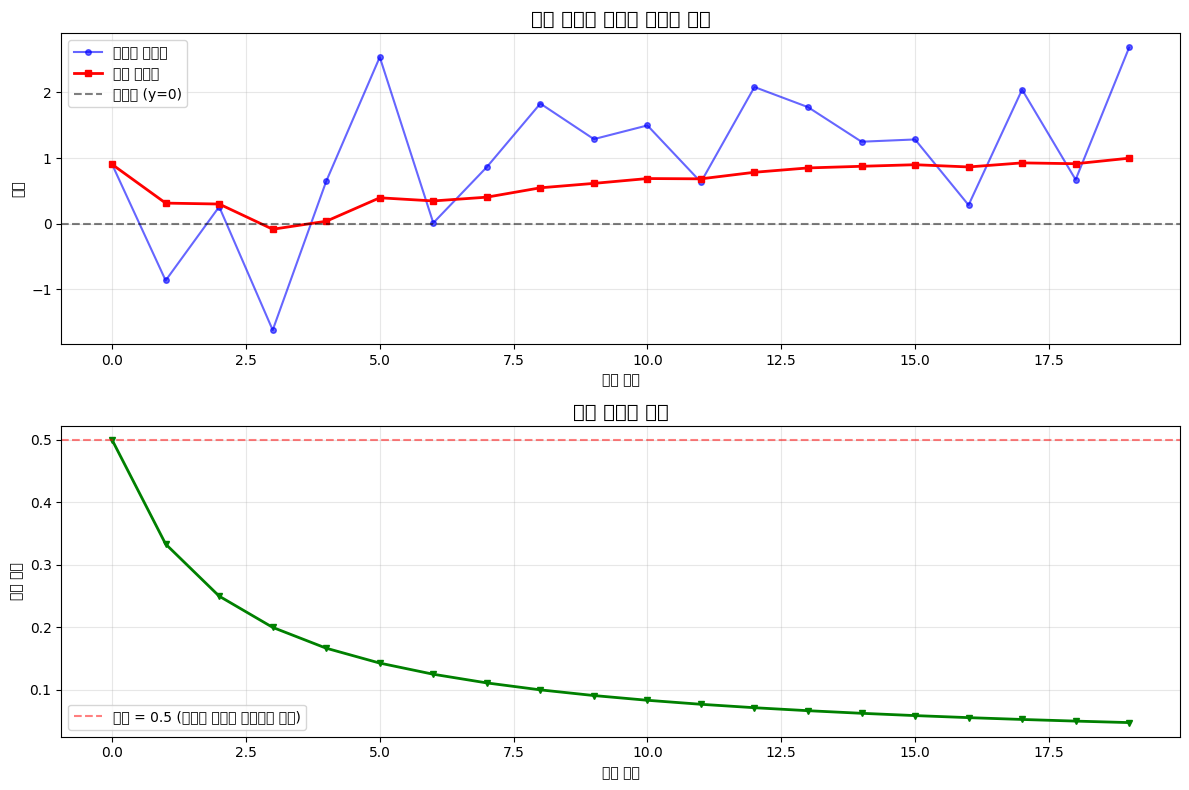


[Step 4] ÏÑ±Îä• Î∂ÑÏÑù
-------------------------
üìä Ï†ïÎüâÏ†Å ÏÑ±Îä• ÏßÄÌëú:
----------------------------------------
üìà ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞® (MSE)
   ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞:     2.1080
   ÌïÑÌÑ∞ÎßÅ ÌõÑ:       0.4692
   Í∞úÏÑ†Ïú®:          77.74%

üìä ÌëúÏ§ÄÌé∏Ï∞® (Îç∞Ïù¥ÌÑ∞ ÏÇ∞Ìè¨)
   ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞:     1.0507
   ÌïÑÌÑ∞ÎßÅ ÌõÑ:       0.3089
   Î≥ÄÎèôÏÑ± Í∞êÏÜå:     70.60%

üìç ÌèâÍ∑†Í∞í
   ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞:     1.0020
   ÌïÑÌÑ∞ÎßÅ ÌõÑ:       0.6114

üéØ ÏπºÎßå Í≤åÏù∏ Î∂ÑÏÑù
   ÌèâÍ∑† ÏπºÎßå Í≤åÏù∏:  0.132
   ‚Üí ÏòàÏ∏°Í∞íÏùÑ Îçî Ïã†Î¢∞ÌïòÎäî Í≤ΩÌñ•


üéì Ïò§ÎäòÏùò Ïã§Ïäµ Ï†ïÎ¶¨

‚úÖ ÏôÑÎ£åÎêú Ïã§Ïäµ Ìï≠Î™©:
   1Ô∏è‚É£  1D ÏπºÎßåÌïÑÌÑ∞Î°ú ÎÖ∏Ïù¥Ï¶à ÏúÑÏπò Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ï
   2Ô∏è‚É£  ÏÑºÏÑú ÏúµÌï© (GPS + IMU) Í∞ÄÏ§ë ÌèâÍ∑†
   3Ô∏è‚É£  Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Î∞è ÏÑ±Îä• Î∂ÑÏÑù

üß† ÌïôÏäµÌïú ÌïµÏã¨ Í∞úÎÖê:
   ‚Ä¢ ÏπºÎßå Í≤åÏù∏Ïùò ÏùòÎØ∏ÏôÄ Í≥ÑÏÇ∞
   ‚Ä¢ ÏòàÏ∏°-Í∞±Ïã† ÏÇ¨Ïù¥ÌÅ¥
   ‚Ä¢ ÏÑºÏÑú ÏúµÌï©Ïùò Í∞ÄÏ§ë ÌèâÍ∑†
   ‚Ä¢ Î∂àÌôïÏã§ÏÑ±Í≥º Ïã†Î¢∞ÎèÑÏùò Í¥ÄÍ≥Ñ
   ‚Ä¢ ÏÑ±Îä• ÏßÄÌëú (MSE, Ìë

In [9]:
# ================================================================
# Lab 3: CSV Îç∞Ïù¥ÌÑ∞Ïóê ÏπºÎßåÌïÑÌÑ∞ Ï†ÅÏö© Î∞è ÏãúÍ∞ÅÌôî
# ================================================================
"""
Î™©Ìëú:
- Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÏπºÎßå ÌïÑÌÑ∞Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.
- ÌïÑÌÑ∞ÎßÅ Ï†ÑÌõÑÏùò Ï∞®Ïù¥Î•º ÏãúÍ∞ÅÌôîÌïòÍ≥† ÏÑ±Îä•ÏùÑ Ï†ïÎüâÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌï©ÎãàÎã§.

ÏπºÎßå ÌïÑÌÑ∞Ïùò Ïã§Ï†ú Ï†ÅÏö©:
1. ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
2. ÏãúÏä§ÌÖú Î™®Îç∏ ÏÑ§Ï†ï
3. ÎÖ∏Ïù¥Ï¶à Î™®Îç∏ Ï∂îÏ†ï
4. ÌïÑÌÑ∞ÎßÅ Ï†ÅÏö©
5. Í≤∞Í≥º Í≤ÄÏ¶ù
"""

print("\n\n" + "="*70)
print("Lab 3: CSV Îç∞Ïù¥ÌÑ∞Ïóê ÏπºÎßåÌïÑÌÑ∞ Ï†ÅÏö© Î∞è ÏãúÍ∞ÅÌôî")
print("="*70)

# ÏπºÎßåÌïÑÌÑ∞Î°ú CSV(ÎòêÎäî ÏÉùÏÑ±) Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ï Î∞è ÏãúÍ∞ÅÌôî: CSV: Comma Separated Values(ÏâºÌëúÎ°ú Íµ¨Î∂ÑÎêú Í∞ÑÎã®Ìïú Ìëú ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞ ÌååÏùº)
import random
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ÎòêÎäî ÏÉùÏÑ±
# ---------------------------------
print("\n[Step 1] Îç∞Ïù¥ÌÑ∞ Î°úÎî©")
print("-" * 25)

try:
    # pandasÎ•º ÏÇ¨Ïö©Ìï¥ CSV ÌååÏùº ÏùΩÍ∏∞ ÏãúÎèÑ
    import pandas as pd
    data = pd.read_csv('positions.csv')   # pandasÎ°ú csv ÌååÏùº ÏùΩÏñ¥ Ìëú ÌòïÏãùÏúºÎ°ú ÏûëÏÑ±
    measured_positions = data['position'].tolist()    # data['position']: Ìëú ÌòïÏãùÏùò Îç∞Ïù¥ÌÑ∞ Ï§ë position Î∂ÄÎ∂ÑÎßå Î∞úÏ∑å. tolist(): pandas Series ‚Üí Python Î¶¨Ïä§Ìä∏
    print("‚úÖ CSV ÌååÏùºÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Î∂àÎü¨ÏôîÏäµÎãàÎã§.")
    print(f"   ÌååÏùºÎ™Ö: positions.csv")
    print(f"   Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ïàò: {len(measured_positions)}")
except Exception as e:
    # CSV ÌååÏùºÏù¥ ÏóÜÏúºÎ©¥ ÎûúÎç§ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    print("‚ö†Ô∏è  CSV ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏñ¥ ÎûúÎç§ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.")
    print(f"   Ïò§Î•ò: {type(e).__name__}")

    # Îçî ÌòÑÏã§Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (Ìä∏Î†åÎìú + ÎÖ∏Ïù¥Ï¶à)
    num_points = 20
    measured_positions = []

    for i in range(num_points):
        # ÏïΩÍ∞ÑÏùò Ìä∏Î†åÎìúÏôÄ ÎûúÎç§ ÏõåÌÅ¨ Ï∂îÍ∞Ä
        trend = 0.1 * i  # ÏÑ†Ìòï Ìä∏Î†åÎìú. ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ†ÏàòÎ°ù Ï†êÏ†ê Ïª§ÏßÄÎäî Í≤ΩÌñ•(Îã®Ìé∏Ï†ÅÏù∏ ÏûêÎèôÏ∞® Ïù¥Îèô, ÎìúÎ°†ÏÉÅÏäπ Îì±)
        noise = random.gauss(0, 1)  # Í∞ÄÏö∞ÏãúÏïà ÎÖ∏Ïù¥Ï¶à(ÏÑ†ÌòïÏ†ÅÏù∏ Í∞íÏù¥ Ïò§Ï∞®Ï†ÅÏö©). GPS: ÎåÄÍ∏∞ Í∞ÑÏÑ≠, Í±¥Î¨º Î∞òÏÇ¨, IMU: Ï†ÑÏûê ÎÖ∏Ïù¥Ï¶à, ÏßÑÎèô, Ïπ¥Î©îÎùº: ÌîΩÏÖÄ ÎÖ∏Ïù¥Ï¶à, Ï°∞Î™Ö Î≥ÄÌôî
        random_walk = random.gauss(0, 0.5) if i > 0 else 0  # ÎûúÎç§ ÏõåÌÅ¨: Ï≤´ Î≤àÏß∏Îäî Ïò§Ï∞®Í∞Ä 0Ïù¥Í≥†, Ïù¥ÌõÑÏóêÎäî ÌëúÏ§ÄÏò§Ï∞® 0.5 Ïù¥ÎÇ¥ÏóêÏÑú Ïò§Ï∞®Î∞úÏÉù

        position = trend + noise + random_walk    # Ïù¥Ï†Ñ Ïò§Ï∞®Í∞Ä Í≥ÑÏÜç ÎàÑÏ†Å
        measured_positions.append(position)

print(f"Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ Ïàò: {len(measured_positions)}")
print(f"Ï≤´ 5Í∞ú Ï∏°Ï†ïÍ∞í: {[round(x, 3) for x in measured_positions[:5]]}")

# Step 2: ÏπºÎßåÌïÑÌÑ∞ Ï†ÅÏö©
# ---------------------
print("\n[Step 2] ÏπºÎßåÌïÑÌÑ∞ Ï†ÅÏö©")
print("-" * 30)

# Ï¥àÍ∏∞ ÏÑ§Ï†ï
estimate = measured_positions[0]  # Ï≤´ Î≤àÏß∏ Ï∏°Ï†ïÍ∞íÏúºÎ°ú Ï¥àÍ∏∞Ìôî
estimate_error = 1.0  # Ï¥àÍ∏∞ Î∂àÌôïÏã§ÏÑ±
measurement_error = 1.0  # Ï∏°Ï†ï ÎÖ∏Ïù¥Ï¶à (ÏÑºÏÑú ÌäπÏÑ±)

print(f"Ï¥àÍ∏∞ Ï∂îÏ†ïÍ∞í: {estimate:.3f}")
print(f"Ï∂îÏ†ï Ïò§Ï∞®: {estimate_error}")
print(f"Ï∏°Ï†ï Ïò§Ï∞®: {measurement_error}")

# ÌïÑÌÑ∞ÎßÅÎêú Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
estimates = []
kalman_gains = []  # ÏπºÎßå Í≤åÏù∏ Ï†ÄÏû• (Î∂ÑÏÑùÏö©)

print("\nÏπºÎßå ÌïÑÌÑ∞ÎßÅ ÏßÑÌñâ Ï§ë...")
for i, z in enumerate(measured_positions):
    # ÏπºÎßå Í≤åÏù∏ Í≥ÑÏÇ∞
    # K = P(k|k-1) / (P(k|k-1) + R)
    kalman_gain = estimate_error / (estimate_error + measurement_error)
    kalman_gains.append(kalman_gain)

    # Ï∂îÏ†ïÍ∞í ÏóÖÎç∞Ïù¥Ìä∏ (Ï∏°Ï†ï ÏóÖÎç∞Ïù¥Ìä∏)
    # x(k|k) = x(k|k-1) + K * (z(k) - x(k|k-1))
    estimate = estimate + kalman_gain * (z - estimate)

    # Ï∂îÏ†ï Ïò§Ï∞® ÏóÖÎç∞Ïù¥Ìä∏
    # P(k|k) = (1 - K) * P(k|k-1)
    estimate_error = (1 - kalman_gain) * estimate_error

    # Í≤∞Í≥º Ï†ÄÏû•
    estimates.append(estimate)

    # Ï≤òÏùå Î™á Í∞úÏôÄ ÎßàÏßÄÎßâ Í≤∞Í≥º Ï∂úÎ†•
    if i < 3 or i == len(measured_positions) - 1:
        print(f"[{i+1:2d}] Ï∏°Ï†ï:{z:6.3f} | Í≤åÏù∏:{kalman_gain:.3f} | Ï∂îÏ†ï:{estimate:6.3f}")

print(f"ÏπºÎßå ÌïÑÌÑ∞ÎßÅ ÏôÑÎ£å! Ï¥ù {len(estimates)}Í∞ú Ìè¨Ïù∏Ìä∏ Ï≤òÎ¶¨")

# Step 3: ÏãúÍ∞ÅÌôî
# --------------
print("\n[Step 3] Í≤∞Í≥º ÏãúÍ∞ÅÌôî")
print("-" * 25)

plt.figure(figsize=(12, 8))

# ÏÑúÎ∏åÌîåÎ°Ø 1: ÌïÑÌÑ∞ÎßÅ Í≤∞Í≥º ÎπÑÍµê
plt.subplot(2, 1, 1)
plt.plot(measured_positions, 'o-', label='ÎÖ∏Ïù¥Ï¶à Ï∏°Ï†ïÍ∞í', alpha=0.6,
         markersize=4, linewidth=1.5, color='blue')
plt.plot(estimates, 's-', label='ÏπºÎßå ÌïÑÌÑ∞ÎßÅ', linewidth=2,
         markersize=4, color='red')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Ï∞∏Ï°∞ÏÑ† (y=0)')

plt.title('ÏπºÎßå ÌïÑÌÑ∞Î•º Ïù¥Ïö©Ìïú ÎÖ∏Ïù¥Ï¶à Ï†úÍ±∞', fontsize=14, fontweight='bold')
plt.xlabel('ÏãúÍ∞Ñ Îã®Í≥Ñ')
plt.ylabel('ÏúÑÏπò')
plt.legend()
plt.grid(True, alpha=0.3)

# ÏÑúÎ∏åÌîåÎ°Ø 2: ÏπºÎßå Í≤åÏù∏ Î≥ÄÌôî
plt.subplot(2, 1, 2)
plt.plot(kalman_gains, 'g-', marker='v', linewidth=2, markersize=5)
plt.title('ÏπºÎßå Í≤åÏù∏Ïùò Î≥ÄÌôî', fontsize=14, fontweight='bold')
plt.xlabel('ÏãúÍ∞Ñ Îã®Í≥Ñ')
plt.ylabel('ÏπºÎßå Í≤åÏù∏')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5,
           label='Í≤åÏù∏ = 0.5 (Ï∏°Ï†ïÍ≥º ÏòàÏ∏°ÏùÑ ÎèôÎì±ÌïòÍ≤å Ïã†Î¢∞)')
plt.legend()

plt.tight_layout()
print("Í∑∏ÎûòÌîÑÍ∞Ä ÌëúÏãúÎê©ÎãàÎã§.")
plt.show()

# Step 4: ÏÑ±Îä• Î∂ÑÏÑù
# -----------------
print("\n[Step 4] ÏÑ±Îä• Î∂ÑÏÑù")
print("-" * 25)

# ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) Í≥ÑÏÇ∞ (Ï∞∏Ï°∞Í∞íÏùÑ 0ÏúºÎ°ú Í∞ÄÏ†ï)
original_mse = np.mean([(pos - 0)**2 for pos in measured_positions])
filtered_mse = np.mean([(est - 0)**2 for est in estimates])

# ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
original_std = np.std(measured_positions)
filtered_std = np.std(estimates)

# ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
original_mean = np.mean(measured_positions)
filtered_mean = np.mean(estimates)

print("üìä Ï†ïÎüâÏ†Å ÏÑ±Îä• ÏßÄÌëú:")
print("-" * 40)
print(f"üìà ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞® (MSE)")
print(f"   ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞:     {original_mse:.4f}")
print(f"   ÌïÑÌÑ∞ÎßÅ ÌõÑ:       {filtered_mse:.4f}")
print(f"   Í∞úÏÑ†Ïú®:          {((original_mse - filtered_mse) / original_mse * 100):.2f}%")

print(f"\nüìä ÌëúÏ§ÄÌé∏Ï∞® (Îç∞Ïù¥ÌÑ∞ ÏÇ∞Ìè¨)")
print(f"   ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞:     {original_std:.4f}")
print(f"   ÌïÑÌÑ∞ÎßÅ ÌõÑ:       {filtered_std:.4f}")
print(f"   Î≥ÄÎèôÏÑ± Í∞êÏÜå:     {((original_std - filtered_std) / original_std * 100):.2f}%")

print(f"\nüìç ÌèâÍ∑†Í∞í")
print(f"   ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞:     {original_mean:.4f}")
print(f"   ÌïÑÌÑ∞ÎßÅ ÌõÑ:       {filtered_mean:.4f}")

# ÏπºÎßå Í≤åÏù∏ Î∂ÑÏÑù
avg_gain = np.mean(kalman_gains)
print(f"\nüéØ ÏπºÎßå Í≤åÏù∏ Î∂ÑÏÑù")
print(f"   ÌèâÍ∑† ÏπºÎßå Í≤åÏù∏:  {avg_gain:.3f}")
if avg_gain > 0.5:
    print("   ‚Üí Ï∏°Ï†ïÍ∞íÏùÑ Îçî Ïã†Î¢∞ÌïòÎäî Í≤ΩÌñ•")
elif avg_gain < 0.5:
    print("   ‚Üí ÏòàÏ∏°Í∞íÏùÑ Îçî Ïã†Î¢∞ÌïòÎäî Í≤ΩÌñ•")
else:
    print("   ‚Üí Ï∏°Ï†ïÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏùÑ Í∑†Îì±ÌïòÍ≤å Ïã†Î¢∞")

# ================================================================
# Ïò§ÎäòÏùò Ïã§Ïäµ Ï†ïÎ¶¨
# ================================================================
print("\n\n" + "="*70)
print("üéì Ïò§ÎäòÏùò Ïã§Ïäµ Ï†ïÎ¶¨")
print("="*70)

print("\n‚úÖ ÏôÑÎ£åÎêú Ïã§Ïäµ Ìï≠Î™©:")
print("   1Ô∏è‚É£  1D ÏπºÎßåÌïÑÌÑ∞Î°ú ÎÖ∏Ïù¥Ï¶à ÏúÑÏπò Îç∞Ïù¥ÌÑ∞ Î≥¥Ï†ï")
print("   2Ô∏è‚É£  ÏÑºÏÑú ÏúµÌï© (GPS + IMU) Í∞ÄÏ§ë ÌèâÍ∑†")
print("   3Ô∏è‚É£  Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî Î∞è ÏÑ±Îä• Î∂ÑÏÑù")

print("\nüß† ÌïôÏäµÌïú ÌïµÏã¨ Í∞úÎÖê:")
print("   ‚Ä¢ ÏπºÎßå Í≤åÏù∏Ïùò ÏùòÎØ∏ÏôÄ Í≥ÑÏÇ∞")
print("   ‚Ä¢ ÏòàÏ∏°-Í∞±Ïã† ÏÇ¨Ïù¥ÌÅ¥")
print("   ‚Ä¢ ÏÑºÏÑú ÏúµÌï©Ïùò Í∞ÄÏ§ë ÌèâÍ∑†")
print("   ‚Ä¢ Î∂àÌôïÏã§ÏÑ±Í≥º Ïã†Î¢∞ÎèÑÏùò Í¥ÄÍ≥Ñ")
print("   ‚Ä¢ ÏÑ±Îä• ÏßÄÌëú (MSE, ÌëúÏ§ÄÌé∏Ï∞®)")

print("\nüîç ÏπºÎßå ÌïÑÌÑ∞Ïùò ÌïµÏã¨ ÌÜµÏ∞∞:")
print("   ‚Ä¢ Í≤åÏù∏Ïù¥ ÌÅ¥ÏàòÎ°ù Ï∏°Ï†ïÍ∞íÏùÑ Îçî Ïã†Î¢∞")
print("   ‚Ä¢ Í≤åÏù∏Ïù¥ ÏûëÏùÑÏàòÎ°ù ÏòàÏ∏°Í∞íÏùÑ Îçî Ïã†Î¢∞")
print("   ‚Ä¢ Î∞òÎ≥µÌï†ÏàòÎ°ù Ï∂îÏ†ï Ïò§Ï∞®Í∞Ä Í∞êÏÜå")
print("   ‚Ä¢ ÏÑºÏÑú ÏúµÌï©ÏúºÎ°ú Îã®Ïùº ÏÑºÏÑúÎ≥¥Îã§ Ïö∞ÏàòÌïú ÏÑ±Îä•")

print("\nüìä Ï†úÏ∂ú ÏûêÎ£å:")
print("   ‚Ä¢ ColabÏóêÏÑú Í≤∞Í≥º(ÌîåÎ°Ø, ÏàòÏπò)Î•º Ï†ÄÏû•Ìï¥ Ï†úÏ∂úÌïòÏÑ∏Ïöî")
print("   ‚Ä¢ Í∑∏ÎûòÌîÑ Ïù¥ÎØ∏ÏßÄÏôÄ ÏÑ±Îä• ÏßÄÌëúÎ•º Ìè¨Ìï®ÌïòÏÑ∏Ïöî")

print("\n‚ùì Ï∂îÍ∞Ä ÏßàÎ¨∏Ïù¥ÎÇò ÎèÑÏõÄÏù¥ ÌïÑÏöîÌïòÎ©¥:")
print("   ‚Ä¢ Í∞ïÏùò Ìè¨ÎüºÏóê ÏßàÎ¨∏ Í≤åÏãú")
print("   ‚Ä¢ Ïù¥Î©îÏùºÎ°ú Î¨∏Ïùò")
print("   ‚Ä¢ Ïã§Ïäµ ÏΩîÎìúÎ•º ÏàòÏ†ïÌï¥Î≥¥Î©∞ Ïã§Ìóò")

print("\nüöÄ Îã§Ïùå Ïã§Ïäµ ÎØ∏Î¶¨Î≥¥Í∏∞:")
print("   ‚Ä¢ 2D ÏπºÎßå ÌïÑÌÑ∞ (ÏúÑÏπò + ÏÜçÎèÑ)")
print("   ‚Ä¢ ÌôïÏû• ÏπºÎßå ÌïÑÌÑ∞ (ÎπÑÏÑ†Ìòï ÏãúÏä§ÌÖú)")
print("   ‚Ä¢ Ïã§Ï†ú ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨")

print("\n" + "="*70)
print("Ïã§Ïäµ ÏôÑÎ£å! ÏàòÍ≥†ÌïòÏÖ®ÏäµÎãàÎã§! üéâ")
print("="*70)

Sensor fusion(GPS+IMU)

GPS + IMU ÏÑºÏÑú ÏúµÌï© ÏãúÎÆ¨Î†àÏù¥ÏÖò
ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏÑ§Ï†ï:
  - ÏãúÍ∞Ñ Í∞ÑÍ≤© (dt): 0.1Ï¥à
  - IMU ÏóÖÎç∞Ïù¥Ìä∏: 10.0Hz
  - GPS ÏóÖÎç∞Ïù¥Ìä∏: 1.0Hz
  - Ï¥ù ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÍ∞Ñ: 20Ï¥à
  - Ï¥ù Ïä§ÌÖù Ïàò: 200

[Step 1] ÏßÑÏã§ Í∂§Ï†Å ÏÉùÏÑ±
------------------------------
ÏõêÌòï Í∂§Ï†Å ÏÉùÏÑ± Ï§ë...
ÏßÑÏã§ Í∂§Ï†Å ÏÉùÏÑ± ÏôÑÎ£å - 200Í∞ú Ìè¨Ïù∏Ìä∏

[Step 2] ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò
-----------------------------------
GPS ÏÑ§Ï†ï:
  - ÏúÑÏπò ÎÖ∏Ïù¥Ï¶à: ¬±2.0m (ÌëúÏ§ÄÌé∏Ï∞®)
  - ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞: 1.0Ï¥à
IMU ÏÑ§Ï†ï:
  - Í∞ÄÏÜçÎèÑ ÎÖ∏Ïù¥Ï¶à: ¬±0.5m/s¬≤ (ÌëúÏ§ÄÌé∏Ï∞®)
  - Î∞îÏù¥Ïñ¥Ïä§: x=0.1, y=-0.05 m/s¬≤
  - ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞: 0.1Ï¥à

ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Ï§ë...
ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± ÏôÑÎ£å:
  - IMU Îç∞Ïù¥ÌÑ∞: 200Í∞ú
  - GPS Îç∞Ïù¥ÌÑ∞: 20Í∞ú

[Step 3] ÏπºÎßå ÌïÑÌÑ∞ ÏÑ§Í≥Ñ
------------------------------

[Step 4] ÏÑºÏÑú ÏúµÌï© Ïã§Ìñâ
-------------------------
ÏπºÎßå ÌïÑÌÑ∞ Ï¥àÍ∏∞Ìôî ÏôÑÎ£å:
  - ÏÉÅÌÉú Î≤°ÌÑ∞: [x, y, vx, vy]
  - ÏÉÅÌÉú Ï∞®Ïõê: 4
  - GPS Ï∏°Ï†ï Ï∞®Ïõê: 2
ÏÑ

Í∑∏ÎûòÌîÑÍ∞Ä ÌëúÏãúÎê©ÎãàÎã§.


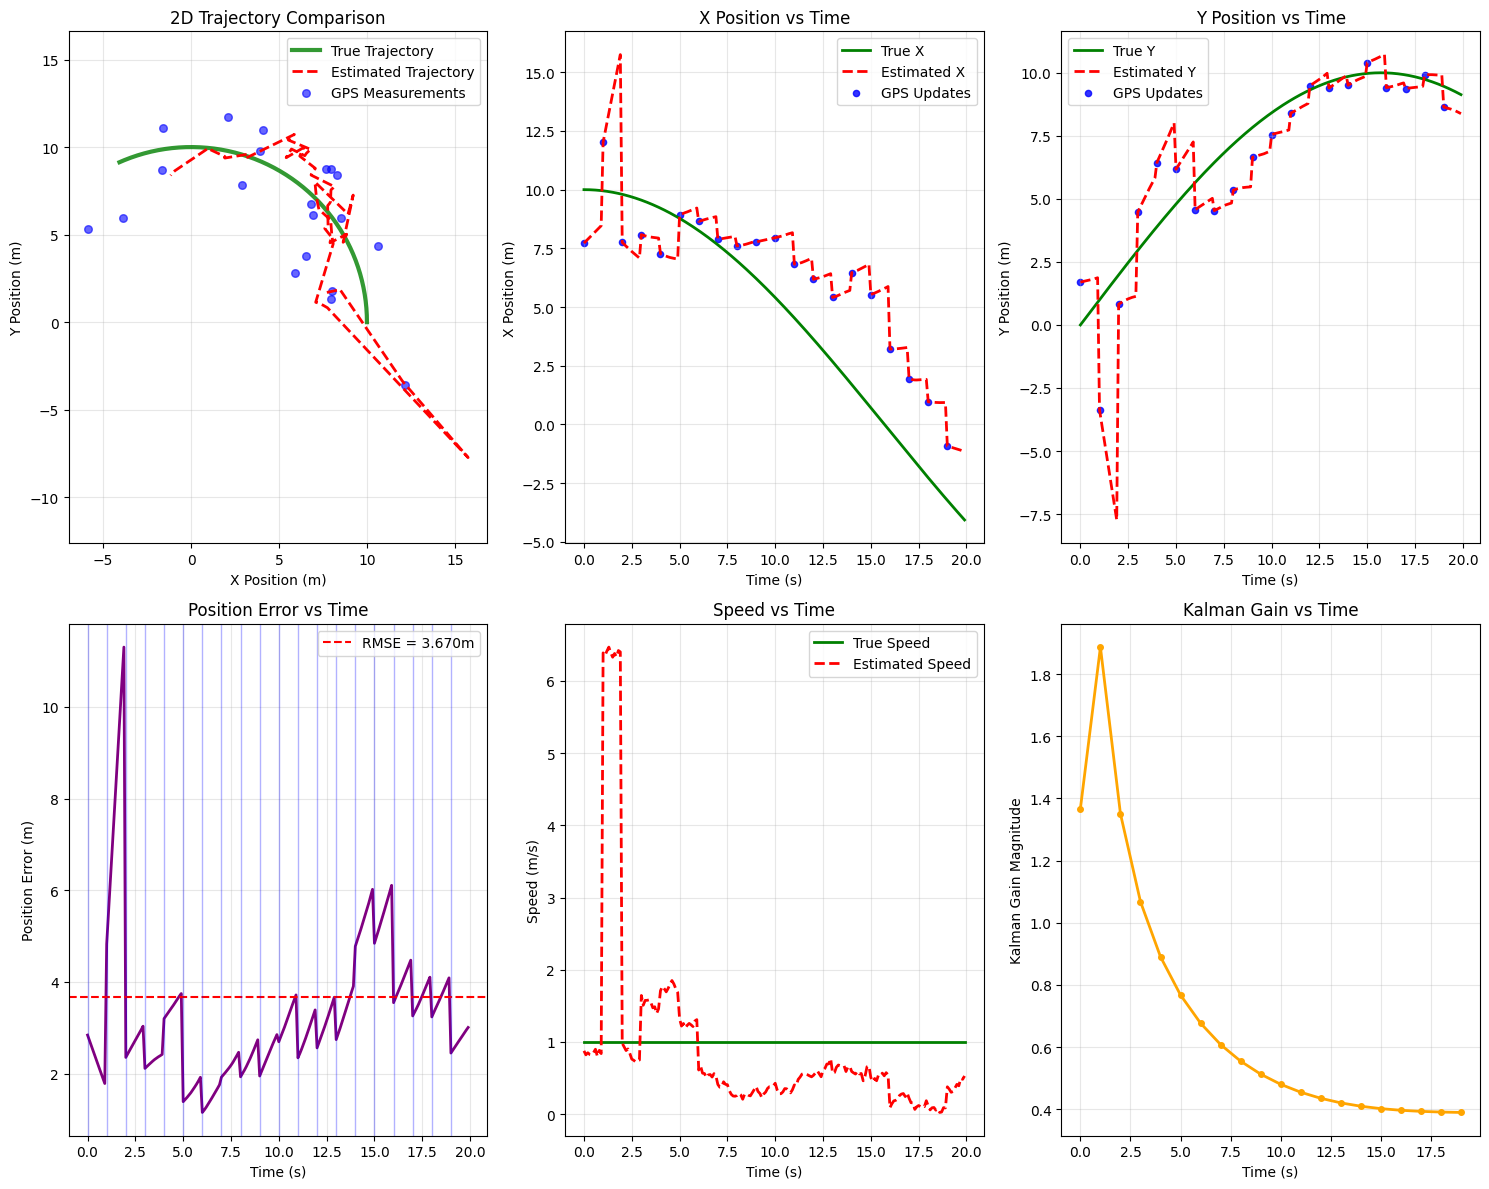


ÏÉÅÏÑ∏ Î∂ÑÏÑù Î∞è Í≤∞Î°†

üìä Ï†ïÎüâÏ†Å ÏÑ±Îä• Î∂ÑÏÑù:
ÏßÄÌëú                   Í∞í               ÏÑ§Î™Ö
-------------------------------------------------------
ÏúÑÏπò RMSE              3.670   m     ÌèâÍ∑† ÏúÑÏπò Ïò§Ï∞®
ÏÜçÎèÑ RMSE              1.926   m/s   ÌèâÍ∑† ÏÜçÎèÑ Ïò§Ï∞®
ÏµúÎåÄ ÏúÑÏπò Ïò§Ï∞®             11.303  m     ÏµúÏïÖ Í≤ΩÏö∞ ÏúÑÏπò Ïò§Ï∞®
GPS Îã®ÎèÖ RMSE          3.382   m     GPSÎßå ÏÇ¨Ïö© Ïãú Ïò§Ï∞®
Í∞úÏÑ†Ïú®                  -8.5    %     ÏÑºÏÑú ÏúµÌï©ÏúºÎ°ú Ïù∏Ìïú Í∞úÏÑ†

üîç ÏÑºÏÑú ÏúµÌï©Ïùò ÌïµÏã¨ ÏõêÎ¶¨:
1. üéØ ÏòàÏ∏° Îã®Í≥Ñ (Predict):
   ‚Ä¢ IMU Í∞ÄÏÜçÎèÑÎ°ú ÏúÑÏπòÏôÄ ÏÜçÎèÑ ÏòàÏ∏°
   ‚Ä¢ Ïö¥Îèô Î∞©Ï†ïÏãù ÏÇ¨Ïö©: x = x‚ÇÄ + v‚ÇÄt + ¬Ωat¬≤
   ‚Ä¢ Î∂àÌôïÏã§ÏÑ±ÎèÑ Ìï®Íªò Ï†ÑÌåå

2. üì° ÏóÖÎç∞Ïù¥Ìä∏ Îã®Í≥Ñ (Update):
   ‚Ä¢ GPS Ï∏°Ï†ïÍ∞íÏúºÎ°ú ÏòàÏ∏° Î≥¥Ï†ï
   ‚Ä¢ ÏπºÎßå Í≤åÏù∏ÏúºÎ°ú Ïã†Î¢∞ÎèÑ Í≤∞Ï†ï
   ‚Ä¢ ÎÜíÏùÄ Í≤åÏù∏ = GPS Îçî Ïã†Î¢∞, ÎÇÆÏùÄ Í≤åÏù∏ = ÏòàÏ∏° Îçî Ïã†Î¢∞

üí° ÏÑºÏÑúÎ≥Ñ ÌäπÏÑ± ÌôúÏö©:
‚Ä¢ GPS (1Hz): Ï†àÎåÄ ÏúÑÏπò Ï†úÍ≥µ, ÎìúÎ¶¨ÌîÑÌä∏ ÏóÜÏùå
‚Ä¢ 

In [6]:
"""
GPS + IMU ÏÑºÏÑú ÏúµÌï© ÏãúÎÆ¨Î†àÏù¥ÏÖò
=================================

Ïù¥ ÏΩîÎìúÎäî GPSÏôÄ IMU ÏÑºÏÑúÎ•º ÏπºÎßå ÌïÑÌÑ∞Î°ú ÏúµÌï©ÌïòÏó¨
Ï†ïÌôïÌïú ÏúÑÏπòÏôÄ ÏÜçÎèÑÎ•º Ï∂îÏ†ïÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.

ÏãúÏä§ÌÖú Î™®Îç∏:
- ÏÉÅÌÉú: [x, y, vx, vy] (ÏúÑÏπò x,yÏôÄ ÏÜçÎèÑ vx,vy)
- GPS: ÏúÑÏπò Ï∏°Ï†ï (ÎäêÎ¶¨ÏßÄÎßå Ï†ïÌôï)
- IMU: Í∞ÄÏÜçÎèÑ Ï∏°Ï†ï (Îπ†Î•¥ÏßÄÎßå ÎìúÎ¶¨ÌîÑÌä∏)
"""

import numpy as np
import matplotlib.pyplot as plt
import random
import math

# ================================================================
# 1. ÏãúÏä§ÌÖú ÏÑ§Ï†ï Î∞è Ï¥àÍ∏∞Ìôî
# ================================================================

print("="*70)
print("GPS + IMU ÏÑºÏÑú ÏúµÌï© ÏãúÎÆ¨Î†àÏù¥ÏÖò")
print("="*70)

# ÏãúÎÆ¨Î†àÏù¥ÏÖò Îß§Í∞úÎ≥ÄÏàò ÏÑ§Ï†ï
dt = 0.1  # ÏãúÍ∞Ñ Í∞ÑÍ≤© (Ï¥à) - IMUÎäî 10HzÎ°ú ÏóÖÎç∞Ïù¥Ìä∏
gps_update_rate = 10  # GPSÎäî IMU 10Î≤à Ï§ë 1Î≤àÎßå ÏóÖÎç∞Ïù¥Ìä∏ (1Hz)
total_time = 20  # Ï¥ù ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÍ∞Ñ (Ï¥à)
steps = int(total_time / dt)  # Ï¥ù ÏãúÎÆ¨Î†àÏù¥ÏÖò Ïä§ÌÖù Ïàò

print(f"ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏÑ§Ï†ï:")
print(f"  - ÏãúÍ∞Ñ Í∞ÑÍ≤© (dt): {dt}Ï¥à")
print(f"  - IMU ÏóÖÎç∞Ïù¥Ìä∏: {1/dt}Hz")
print(f"  - GPS ÏóÖÎç∞Ïù¥Ìä∏: {1/(dt*gps_update_rate)}Hz")
print(f"  - Ï¥ù ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏãúÍ∞Ñ: {total_time}Ï¥à")
print(f"  - Ï¥ù Ïä§ÌÖù Ïàò: {steps}")

# ================================================================
# 2. ÏßÑÏã§ Í∂§Ï†Å ÏÉùÏÑ± (Ground Truth)
# ================================================================

print(f"\n[Step 1] ÏßÑÏã§ Í∂§Ï†Å ÏÉùÏÑ±")
print("-" * 30)

# ÏõêÌòï Í∂§Ï†ÅÏùÑ Îî∞Îùº ÏõÄÏßÅÏù¥Îäî Í∞ùÏ≤¥ ÏãúÎÆ¨Î†àÏù¥ÏÖò
radius = 10.0  # ÏõêÏùò Î∞òÏßÄÎ¶Ñ (ÎØ∏ÌÑ∞)
angular_velocity = 0.1  # Í∞ÅÏÜçÎèÑ (rad/s)

# ÏßÑÏã§Í∞í Ï†ÄÏû• Î∞∞Ïó¥
true_positions = []  # Ïã§Ï†ú ÏúÑÏπò [x, y]
true_velocities = []  # Ïã§Ï†ú ÏÜçÎèÑ [vx, vy]
true_accelerations = []  # Ïã§Ï†ú Í∞ÄÏÜçÎèÑ [ax, ay]

print("ÏõêÌòï Í∂§Ï†Å ÏÉùÏÑ± Ï§ë...")
for i in range(steps):
    t = i * dt  # ÌòÑÏû¨ ÏãúÍ∞Ñ

    # ÏõêÌòï Ïö¥Îèô: x = r*cos(œât), y = r*sin(œât)
    x = radius * math.cos(angular_velocity * t)
    y = radius * math.sin(angular_velocity * t)

    # ÏÜçÎèÑ: vx = -rœâ*sin(œât), vy = rœâ*cos(œât)
    vx = -radius * angular_velocity * math.sin(angular_velocity * t)
    vy = radius * angular_velocity * math.cos(angular_velocity * t)

    # Í∞ÄÏÜçÎèÑ: ax = -rœâ¬≤*cos(œât), ay = -rœâ¬≤*sin(œât)
    ax = -radius * angular_velocity**2 * math.cos(angular_velocity * t)
    ay = -radius * angular_velocity**2 * math.sin(angular_velocity * t)

    true_positions.append([x, y])
    true_velocities.append([vx, vy])
    true_accelerations.append([ax, ay])

print(f"ÏßÑÏã§ Í∂§Ï†Å ÏÉùÏÑ± ÏôÑÎ£å - {len(true_positions)}Í∞ú Ìè¨Ïù∏Ìä∏")

# ================================================================
# 3. ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò
# ================================================================

print(f"\n[Step 2] ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏãúÎÆ¨Î†àÏù¥ÏÖò")
print("-" * 35)

# GPS ÏÑºÏÑú ÌäπÏÑ±
gps_position_noise = 2.0  # GPS ÏúÑÏπò ÎÖ∏Ïù¥Ï¶à ÌëúÏ§ÄÌé∏Ï∞® (ÎØ∏ÌÑ∞)
print(f"GPS ÏÑ§Ï†ï:")
print(f"  - ÏúÑÏπò ÎÖ∏Ïù¥Ï¶à: ¬±{gps_position_noise}m (ÌëúÏ§ÄÌé∏Ï∞®)")
print(f"  - ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞: {dt*gps_update_rate}Ï¥à")

# IMU ÏÑºÏÑú ÌäπÏÑ±
imu_acceleration_noise = 0.5  # IMU Í∞ÄÏÜçÎèÑ ÎÖ∏Ïù¥Ï¶à ÌëúÏ§ÄÌé∏Ï∞® (m/s¬≤)
imu_bias = [0.1, -0.05]  # IMU Î∞îÏù¥Ïñ¥Ïä§ (ÏùºÏ†ïÌïú Ïò§Ï∞®)
print(f"IMU ÏÑ§Ï†ï:")
print(f"  - Í∞ÄÏÜçÎèÑ ÎÖ∏Ïù¥Ï¶à: ¬±{imu_acceleration_noise}m/s¬≤ (ÌëúÏ§ÄÌé∏Ï∞®)")
print(f"  - Î∞îÏù¥Ïñ¥Ïä§: x={imu_bias[0]}, y={imu_bias[1]} m/s¬≤")
print(f"  - ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞: {dt}Ï¥à")

# ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Î∞∞Ïó¥
gps_measurements = []  # GPS Ï∏°Ï†ïÍ∞í
imu_measurements = []  # IMU Ï∏°Ï†ïÍ∞í
measurement_times = []  # Ï∏°Ï†ï ÏãúÍ∞Ñ

print("\nÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Ï§ë...")
for i in range(steps):
    t = i * dt

    # IMU Îç∞Ïù¥ÌÑ∞ (Îß§ Ïä§ÌÖùÎßàÎã§ ÏóÖÎç∞Ïù¥Ìä∏)
    # Ïã§Ï†ú Í∞ÄÏÜçÎèÑÏóê ÎÖ∏Ïù¥Ï¶àÏôÄ Î∞îÏù¥Ïñ¥Ïä§ Ï∂îÍ∞Ä
    true_acc = true_accelerations[i]
    noisy_acc_x = true_acc[0] + random.gauss(0, imu_acceleration_noise) + imu_bias[0]
    noisy_acc_y = true_acc[1] + random.gauss(0, imu_acceleration_noise) + imu_bias[1]
    imu_measurements.append([noisy_acc_x, noisy_acc_y])

    # GPS Îç∞Ïù¥ÌÑ∞ (GPS ÏóÖÎç∞Ïù¥Ìä∏ Ï£ºÍ∏∞Ïóê Îî∞Îùº)
    if i % gps_update_rate == 0:
        # Ïã§Ï†ú ÏúÑÏπòÏóê ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä
        true_pos = true_positions[i]
        noisy_pos_x = true_pos[0] + random.gauss(0, gps_position_noise)
        noisy_pos_y = true_pos[1] + random.gauss(0, gps_position_noise)
        gps_measurements.append([noisy_pos_x, noisy_pos_y])
        measurement_times.append(i)
    else:
        gps_measurements.append(None)  # GPS Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå

print(f"ÏÑºÏÑú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± ÏôÑÎ£å:")
print(f"  - IMU Îç∞Ïù¥ÌÑ∞: {len(imu_measurements)}Í∞ú")
print(f"  - GPS Îç∞Ïù¥ÌÑ∞: {len([x for x in gps_measurements if x is not None])}Í∞ú")

# ================================================================
# 4. ÏπºÎßå ÌïÑÌÑ∞ ÏÑ§Í≥Ñ
# ================================================================

print(f"\n[Step 3] ÏπºÎßå ÌïÑÌÑ∞ ÏÑ§Í≥Ñ")
print("-" * 30)

class GPSIMUKalmanFilter:
    """
    GPS + IMU ÏÑºÏÑú ÏúµÌï©ÏùÑ ÏúÑÌïú ÏπºÎßå ÌïÑÌÑ∞

    ÏÉÅÌÉú Î≤°ÌÑ∞: [x, y, vx, vy]
    - x, y: ÏúÑÏπò (ÎØ∏ÌÑ∞)
    - vx, vy: ÏÜçÎèÑ (m/s)
    """

    def __init__(self, dt):
        """
        ÏπºÎßå ÌïÑÌÑ∞ Ï¥àÍ∏∞Ìôî

        Args:
            dt: ÏãúÍ∞Ñ Í∞ÑÍ≤© (Ï¥à)
        """
        self.dt = dt

        # ÏÉÅÌÉú Î≤°ÌÑ∞ [x, y, vx, vy]
        self.state = np.array([0.0, 0.0, 0.0, 0.0])

        # ÏÉÅÌÉú Í≥µÎ∂ÑÏÇ∞ ÌñâÎ†¨ (Ï¥àÍ∏∞ Î∂àÌôïÏã§ÏÑ±)
        self.P = np.eye(4) * 100  # Ï¥àÍ∏∞ÏóêÎäî Îß§Ïö∞ Î∂àÌôïÏã§

        # ÏÉÅÌÉú Ï†ÑÏù¥ ÌñâÎ†¨ (Ïö¥Îèô Î∞©Ï†ïÏãù)
        # x(k+1) = x(k) + vx(k)*dt
        # y(k+1) = y(k) + vy(k)*dt
        # vx(k+1) = vx(k) + ax*dt
        # vy(k+1) = vy(k) + ay*dt
        self.F = np.array([
            [1, 0, dt, 0 ],   # x(k+1) = x(k) + vx*dt
            [0, 1, 0 , dt],   # y(k+1) = y(k) + vy*dt
            [0, 0, 1 , 0 ],   # vx(k+1) = vx(k) + ax*dt
            [0, 0, 0 , 1 ]    # vy(k+1) = vy(k) + ay*dt
        ])

        # Ï†úÏñ¥ ÏûÖÎ†• ÌñâÎ†¨ (Í∞ÄÏÜçÎèÑ ÏûÖÎ†•)
        self.B = np.array([
            [0.5*dt**2, 0],       # xÏóê ÎåÄÌïú Í∞ÄÏÜçÎèÑ ÏòÅÌñ•
            [0, 0.5*dt**2],       # yÏóê ÎåÄÌïú Í∞ÄÏÜçÎèÑ ÏòÅÌñ•
            [dt, 0],              # vxÏóê ÎåÄÌïú Í∞ÄÏÜçÎèÑ ÏòÅÌñ•
            [0, dt]               # vyÏóê ÎåÄÌïú Í∞ÄÏÜçÎèÑ ÏòÅÌñ•
        ])

        # GPS Ï∏°Ï†ï ÌñâÎ†¨ (ÏúÑÏπòÎßå Ï∏°Ï†ï)
        self.H_gps = np.array([
            [1, 0, 0, 0],  # x ÏúÑÏπò Ï∏°Ï†ï
            [0, 1, 0, 0]   # y ÏúÑÏπò Ï∏°Ï†ï
        ])

        # ÌîÑÎ°úÏÑ∏Ïä§ ÎÖ∏Ïù¥Ï¶à Í≥µÎ∂ÑÏÇ∞ (Î™®Îç∏ Î∂àÌôïÏã§ÏÑ±)
        process_noise = 0.1
        self.Q = np.array([
            [dt**4/4, 0, dt**3/2, 0],
            [0, dt**4/4, 0, dt**3/2],
            [dt**3/2, 0, dt**2, 0],
            [0, dt**3/2, 0, dt**2]
        ]) * process_noise

        # GPS Ï∏°Ï†ï ÎÖ∏Ïù¥Ï¶à Í≥µÎ∂ÑÏÇ∞
        gps_noise = gps_position_noise**2
        self.R_gps = np.array([
            [gps_noise, 0],
            [0, gps_noise]
        ])

        print("ÏπºÎßå ÌïÑÌÑ∞ Ï¥àÍ∏∞Ìôî ÏôÑÎ£å:")
        print(f"  - ÏÉÅÌÉú Î≤°ÌÑ∞: [x, y, vx, vy]")
        print(f"  - ÏÉÅÌÉú Ï∞®Ïõê: {len(self.state)}")
        print(f"  - GPS Ï∏°Ï†ï Ï∞®Ïõê: {self.H_gps.shape[0]}")

    def predict(self, acceleration):
        """
        ÏòàÏ∏° Îã®Í≥Ñ: IMU Í∞ÄÏÜçÎèÑÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏÉÅÌÉú ÏòàÏ∏°

        Args:
            acceleration: [ax, ay] IMU Í∞ÄÏÜçÎèÑ Ï∏°Ï†ïÍ∞í
        """
        # ÏÉÅÌÉú ÏòàÏ∏°: x(k|k-1) = F * x(k-1|k-1) + B * u(k)
        self.state = self.F @ self.state + self.B @ acceleration

        # Í≥µÎ∂ÑÏÇ∞ ÏòàÏ∏°: P(k|k-1) = F * P(k-1|k-1) * F^T + Q
        self.P = self.F @ self.P @ self.F.T + self.Q

    def update_gps(self, gps_position):
        """
        GPS ÏóÖÎç∞Ïù¥Ìä∏ Îã®Í≥Ñ: GPS ÏúÑÏπò Ï∏°Ï†ïÍ∞íÏúºÎ°ú ÏÉÅÌÉú Î≥¥Ï†ï

        Args:
            gps_position: [x, y] GPS ÏúÑÏπò Ï∏°Ï†ïÍ∞í
        """
        # Ï∏°Ï†ï ÏûîÏ∞®: y = z - H * x(k|k-1)
        z = np.array(gps_position)
        y = z - self.H_gps @ self.state

        # ÏûîÏ∞® Í≥µÎ∂ÑÏÇ∞: S = H * P(k|k-1) * H^T + R
        S = self.H_gps @ self.P @ self.H_gps.T + self.R_gps

        # ÏπºÎßå Í≤åÏù∏: K = P(k|k-1) * H^T * S^(-1)
        K = self.P @ self.H_gps.T @ np.linalg.inv(S)

        # ÏÉÅÌÉú ÏóÖÎç∞Ïù¥Ìä∏: x(k|k) = x(k|k-1) + K * y
        self.state = self.state + K @ y

        # Í≥µÎ∂ÑÏÇ∞ ÏóÖÎç∞Ïù¥Ìä∏: P(k|k) = (I - K * H) * P(k|k-1)
        I = np.eye(len(self.state))
        self.P = (I - K @ self.H_gps) @ self.P

        return K  # ÏπºÎßå Í≤åÏù∏ Î∞òÌôò (Î∂ÑÏÑùÏö©)

# ================================================================
# 5. ÏÑºÏÑú ÏúµÌï© Ïã§Ìñâ
# ================================================================

print(f"\n[Step 4] ÏÑºÏÑú ÏúµÌï© Ïã§Ìñâ")
print("-" * 25)

# ÏπºÎßå ÌïÑÌÑ∞ Ï¥àÍ∏∞Ìôî
kf = GPSIMUKalmanFilter(dt)

# Í≤∞Í≥º Ï†ÄÏû•
estimated_states = []  # Ï∂îÏ†ïÎêú ÏÉÅÌÉú
kalman_gains = []      # ÏπºÎßå Í≤åÏù∏ (GPS ÏóÖÎç∞Ïù¥Ìä∏ ÏãúÏóêÎßå)
gps_update_indices = []  # GPS ÏóÖÎç∞Ïù¥Ìä∏Îêú Ïù∏Îç±Ïä§

print("ÏÑºÏÑú ÏúµÌï© ÏßÑÌñâ Ï§ë...")
print("Îã®Í≥ÑÎ≥Ñ ÏßÑÌñâ ÏÉÅÌô©:")
print("Step | GPS Update | Position Error | Velocity Error")
print("-" * 55)

for i in range(steps):
    # 1. ÏòàÏ∏° Îã®Í≥Ñ (IMU Í∞ÄÏÜçÎèÑ ÏÇ¨Ïö©)
    imu_acc = imu_measurements[i]
    kf.predict(imu_acc)

    # 2. GPS ÏóÖÎç∞Ïù¥Ìä∏ (GPS Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ ÎïåÎßå)
    gps_updated = False
    if gps_measurements[i] is not None:
        K = kf.update_gps(gps_measurements[i])
        kalman_gains.append(np.linalg.norm(K))  # Í≤åÏù∏ ÌÅ¨Í∏∞
        gps_update_indices.append(i)
        gps_updated = True

    # 3. ÌòÑÏû¨ ÏÉÅÌÉú Ï†ÄÏû•
    estimated_states.append(kf.state.copy())

    # ÏßÑÌñâ ÏÉÅÌô© Ï∂úÎ†• (ÏùºÎ∂ÄÎßå)
    if i % 20 == 0 or gps_updated:
        true_pos = true_positions[i]
        est_pos = kf.state[:2]
        true_vel = true_velocities[i]
        est_vel = kf.state[2:]

        pos_error = np.linalg.norm(est_pos - true_pos)
        vel_error = np.linalg.norm(est_vel - true_vel)

        gps_status = "YES" if gps_updated else "NO"
        print(f"{i:4d} | {gps_status:10s} | {pos_error:8.3f}m     | {vel_error:8.3f}m/s")

print(f"\nÏÑºÏÑú ÏúµÌï© ÏôÑÎ£å!")
print(f"  - Ï¥ù Ï≤òÎ¶¨ Ïä§ÌÖù: {len(estimated_states)}")
print(f"  - GPS ÏóÖÎç∞Ïù¥Ìä∏ ÌöüÏàò: {len(kalman_gains)}")

# ================================================================
# 6. Í≤∞Í≥º Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
# ================================================================

print(f"\n[Step 5] Í≤∞Í≥º Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî")
print("-" * 35)

# numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôò (Í≥ÑÏÇ∞ Ìé∏ÏùòÏÑ±)
true_positions = np.array(true_positions)
estimated_states = np.array(estimated_states)
estimated_positions = estimated_states[:, :2]  # ÏúÑÏπòÎßå Ï∂îÏ∂ú
estimated_velocities = estimated_states[:, 2:]  # ÏÜçÎèÑÎßå Ï∂îÏ∂ú

# ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
position_errors = np.linalg.norm(estimated_positions - true_positions, axis=1)
velocity_errors = np.linalg.norm(estimated_velocities - true_velocities, axis=1)

rmse_position = np.sqrt(np.mean(position_errors**2))
rmse_velocity = np.sqrt(np.mean(velocity_errors**2))
max_position_error = np.max(position_errors)
max_velocity_error = np.max(velocity_errors)

print("ÏÑ±Îä• Î∂ÑÏÑù Í≤∞Í≥º:")
print(f"  ÏúÑÏπò RMSE: {rmse_position:.3f}m")
print(f"  ÏÜçÎèÑ RMSE: {rmse_velocity:.3f}m/s")
print(f"  ÏµúÎåÄ ÏúÑÏπò Ïò§Ï∞®: {max_position_error:.3f}m")
print(f"  ÏµúÎåÄ ÏÜçÎèÑ Ïò§Ï∞®: {max_velocity_error:.3f}m/s")

# GPSÎßå ÏÇ¨Ïö©ÌñàÏùÑ ÎïåÏôÄ ÎπÑÍµê
gps_only_errors = []
for i, gps_meas in enumerate(gps_measurements):
    if gps_meas is not None:
        true_pos = true_positions[i]
        gps_error = np.linalg.norm(gps_meas - true_pos)
        gps_only_errors.append(gps_error)

gps_rmse = np.sqrt(np.mean(np.array(gps_only_errors)**2))
print(f"  GPSÎßå ÏÇ¨Ïö© Ïãú RMSE: {gps_rmse:.3f}m")
print(f"  ÏÑºÏÑú ÏúµÌï© Í∞úÏÑ†Ïú®: {((gps_rmse - rmse_position) / gps_rmse * 100):.1f}%")

# ================================================================
# 7. ÏãúÍ∞ÅÌôî
# ================================================================

print(f"\nÍ∑∏ÎûòÌîÑ ÏÉùÏÑ± Ï§ë...")

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏÑ†ÌÉùÏÇ¨Ìï≠)
plt.rcParams['font.family'] = ['Arial', 'DejaVu Sans']

# Ï†ÑÏ≤¥ Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
fig = plt.figure(figsize=(15, 12))

# 1. Í∂§Ï†Å ÎπÑÍµê (2D)
plt.subplot(2, 3, 1)
plt.plot(true_positions[:, 0], true_positions[:, 1], 'g-',
         linewidth=3, label='True Trajectory', alpha=0.8)
plt.plot(estimated_positions[:, 0], estimated_positions[:, 1], 'r--',
         linewidth=2, label='Estimated Trajectory')

# GPS Ï∏°Ï†ïÏ†ê ÌëúÏãú
gps_x = [gps_measurements[i][0] for i in range(len(gps_measurements)) if gps_measurements[i] is not None]
gps_y = [gps_measurements[i][1] for i in range(len(gps_measurements)) if gps_measurements[i] is not None]
plt.scatter(gps_x, gps_y, c='blue', s=30, alpha=0.6, label='GPS Measurements')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('2D Trajectory Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# 2. X ÏúÑÏπò ÏãúÍ∞Ñ Î≥ÄÌôî
plt.subplot(2, 3, 2)
time_axis = np.arange(steps) * dt
plt.plot(time_axis, true_positions[:, 0], 'g-', linewidth=2, label='True X')
plt.plot(time_axis, estimated_positions[:, 0], 'r--', linewidth=2, label='Estimated X')

# GPS ÏóÖÎç∞Ïù¥Ìä∏ ÏãúÏ†ê ÌëúÏãú
gps_times = [i * dt for i in gps_update_indices]
gps_x_values = [estimated_positions[i, 0] for i in gps_update_indices]
plt.scatter(gps_times, gps_x_values, c='blue', s=20, alpha=0.8, label='GPS Updates')

plt.xlabel('Time (s)')
plt.ylabel('X Position (m)')
plt.title('X Position vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Y ÏúÑÏπò ÏãúÍ∞Ñ Î≥ÄÌôî
plt.subplot(2, 3, 3)
plt.plot(time_axis, true_positions[:, 1], 'g-', linewidth=2, label='True Y')
plt.plot(time_axis, estimated_positions[:, 1], 'r--', linewidth=2, label='Estimated Y')

gps_y_values = [estimated_positions[i, 1] for i in gps_update_indices]
plt.scatter(gps_times, gps_y_values, c='blue', s=20, alpha=0.8, label='GPS Updates')

plt.xlabel('Time (s)')
plt.ylabel('Y Position (m)')
plt.title('Y Position vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. ÏúÑÏπò Ïò§Ï∞® ÏãúÍ∞Ñ Î≥ÄÌôî
plt.subplot(2, 3, 4)
plt.plot(time_axis, position_errors, 'purple', linewidth=2)
plt.axhline(y=rmse_position, color='red', linestyle='--',
           label=f'RMSE = {rmse_position:.3f}m')

# GPS ÏóÖÎç∞Ïù¥Ìä∏ ÏãúÏ†êÏùÑ ÏàòÏßÅÏÑ†ÏúºÎ°ú ÌëúÏãú
for gps_time in gps_times:
    plt.axvline(x=gps_time, color='blue', alpha=0.3, linewidth=1)

plt.xlabel('Time (s)')
plt.ylabel('Position Error (m)')
plt.title('Position Error vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. ÏÜçÎèÑ ÎπÑÍµê (ÌÅ¨Í∏∞)
plt.subplot(2, 3, 5)
true_speed = np.linalg.norm(true_velocities, axis=1)
estimated_speed = np.linalg.norm(estimated_velocities, axis=1)

plt.plot(time_axis, true_speed, 'g-', linewidth=2, label='True Speed')
plt.plot(time_axis, estimated_speed, 'r--', linewidth=2, label='Estimated Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Speed vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. ÏπºÎßå Í≤åÏù∏ Î≥ÄÌôî
plt.subplot(2, 3, 6)
if kalman_gains:
    plt.plot(gps_times, kalman_gains, 'orange', marker='o', linewidth=2, markersize=4)
    plt.xlabel('Time (s)')
    plt.ylabel('Kalman Gain Magnitude')
    plt.title('Kalman Gain vs Time')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
print("Í∑∏ÎûòÌîÑÍ∞Ä ÌëúÏãúÎê©ÎãàÎã§.")
plt.show()

# ================================================================
# 8. ÏÉÅÏÑ∏ Î∂ÑÏÑù Î∞è Í≤∞Î°†
# ================================================================

print(f"\n" + "="*70)
print("ÏÉÅÏÑ∏ Î∂ÑÏÑù Î∞è Í≤∞Î°†")
print("="*70)

print(f"\nüìä Ï†ïÎüâÏ†Å ÏÑ±Îä• Î∂ÑÏÑù:")
print(f"{'ÏßÄÌëú':<20} {'Í∞í':<15} {'ÏÑ§Î™Ö'}")
print("-" * 55)
print(f"{'ÏúÑÏπò RMSE':<20} {rmse_position:<8.3f}m     {'ÌèâÍ∑† ÏúÑÏπò Ïò§Ï∞®'}")
print(f"{'ÏÜçÎèÑ RMSE':<20} {rmse_velocity:<8.3f}m/s   {'ÌèâÍ∑† ÏÜçÎèÑ Ïò§Ï∞®'}")
print(f"{'ÏµúÎåÄ ÏúÑÏπò Ïò§Ï∞®':<20} {max_position_error:<8.3f}m     {'ÏµúÏïÖ Í≤ΩÏö∞ ÏúÑÏπò Ïò§Ï∞®'}")
print(f"{'GPS Îã®ÎèÖ RMSE':<20} {gps_rmse:<8.3f}m     {'GPSÎßå ÏÇ¨Ïö© Ïãú Ïò§Ï∞®'}")
print(f"{'Í∞úÏÑ†Ïú®':<20} {((gps_rmse - rmse_position) / gps_rmse * 100):<8.1f}%     {'ÏÑºÏÑú ÏúµÌï©ÏúºÎ°ú Ïù∏Ìïú Í∞úÏÑ†'}")

print(f"\nüîç ÏÑºÏÑú ÏúµÌï©Ïùò ÌïµÏã¨ ÏõêÎ¶¨:")
print("1. üéØ ÏòàÏ∏° Îã®Í≥Ñ (Predict):")
print("   ‚Ä¢ IMU Í∞ÄÏÜçÎèÑÎ°ú ÏúÑÏπòÏôÄ ÏÜçÎèÑ ÏòàÏ∏°")
print("   ‚Ä¢ Ïö¥Îèô Î∞©Ï†ïÏãù ÏÇ¨Ïö©: x = x‚ÇÄ + v‚ÇÄt + ¬Ωat¬≤")
print("   ‚Ä¢ Î∂àÌôïÏã§ÏÑ±ÎèÑ Ìï®Íªò Ï†ÑÌåå")

print("\n2. üì° ÏóÖÎç∞Ïù¥Ìä∏ Îã®Í≥Ñ (Update):")
print("   ‚Ä¢ GPS Ï∏°Ï†ïÍ∞íÏúºÎ°ú ÏòàÏ∏° Î≥¥Ï†ï")
print("   ‚Ä¢ ÏπºÎßå Í≤åÏù∏ÏúºÎ°ú Ïã†Î¢∞ÎèÑ Í≤∞Ï†ï")
print("   ‚Ä¢ ÎÜíÏùÄ Í≤åÏù∏ = GPS Îçî Ïã†Î¢∞, ÎÇÆÏùÄ Í≤åÏù∏ = ÏòàÏ∏° Îçî Ïã†Î¢∞")

print(f"\nüí° ÏÑºÏÑúÎ≥Ñ ÌäπÏÑ± ÌôúÏö©:")
print("‚Ä¢ GPS (1Hz): Ï†àÎåÄ ÏúÑÏπò Ï†úÍ≥µ, ÎìúÎ¶¨ÌîÑÌä∏ ÏóÜÏùå")
print("‚Ä¢ IMU (10Hz): Îπ†Î•∏ ÏóÖÎç∞Ïù¥Ìä∏, Îã®Í∏∞ Ï†ïÌôïÎèÑ Ïö∞Ïàò")
print("‚Ä¢ ÏúµÌï© Ìö®Í≥º: GPSÏùò Ï†ïÌôïÎèÑ + IMUÏùò Î∞òÏùëÏÑ±")

print(f"\nüöÄ Ïã§Ï†ú ÏûêÏú®Ï£ºÌñâ Ï†ÅÏö©:")
print("‚Ä¢ ÌÑ∞ÎÑê/Ïã§ÎÇ¥: IMUÎ°ú Ïó∞ÏÜç Ï∂îÏ†ï")
print("‚Ä¢ Í∞úÌôúÏßÄ: GPSÎ°ú ÎìúÎ¶¨ÌîÑÌä∏ Î≥¥Ï†ï")
print("‚Ä¢ Í∏âÏ†ïÍ±∞/Í∏âÌöåÏ†Ñ: IMUÎ°ú Îπ†Î•∏ ÎåÄÏùë")
print("‚Ä¢ ÏÑºÏÑú Í≥†Ïû•: Îã§Î•∏ ÏÑºÏÑúÎ°ú Î∞±ÏóÖ")

print(f"\nüìà ÏÑ±Îä• Í∞úÏÑ† Î∞©Ìñ•:")
if rmse_position < gps_rmse:
    print(f"‚úÖ ÏÑºÏÑú ÏúµÌï©Ïù¥ GPS Îã®ÎèÖÎ≥¥Îã§ {((gps_rmse - rmse_position) / gps_rmse * 100):.1f}% Í∞úÏÑ†Îê®")
else:
    print(f"‚ö†Ô∏è  Ï∂îÍ∞Ä ÌäúÎãù ÌïÑÏöî - ÎÖ∏Ïù¥Ï¶à Î™®Îç∏Ïù¥ÎÇò Í≤åÏù∏ Ï°∞Ï†ï")

print(f"\nüéì ÌïôÏäµ Ìè¨Ïù∏Ìä∏:")
print("1. ÏπºÎßå ÌïÑÌÑ∞Îäî 'ÏµúÏ†Å' Ï∂îÏ†ïÍ∏∞ (ÏÑ†Ìòï ÏãúÏä§ÌÖú, Í∞ÄÏö∞ÏãúÏïà ÎÖ∏Ïù¥Ï¶à)")
print("2. ÏÑºÏÑú ÏúµÌï© = Í∞Å ÏÑºÏÑúÏùò Ïû•Ï†ê Í∑πÎåÄÌôî")
print("3. Ïã§ÏãúÍ∞Ñ Ï≤òÎ¶¨ Í∞ÄÎä• (Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞ Î∂àÌïÑÏöî)")
print("4. Î∂àÌôïÏã§ÏÑ± Ï†ïÎüâÌôî (Ïã†Î¢∞Íµ¨Í∞Ñ Ï†úÍ≥µ)")

print(f"\n" + "="*70)
print("ÏãúÎÆ¨Î†àÏù¥ÏÖò ÏôÑÎ£å! üéâ")
print("="*70)